# <font color='red'>Backpropagation</font>

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [2]:
data

array([[-1.2879095 , -0.12001342, -1.45900038, -0.66660821, -0.14421743,
         1.85884913],
       [-0.59338101,  0.36716642, -0.30309415, -0.98732948, -0.74026221,
         1.81901037],
       [-0.59338101, -0.26581176, -0.30309415, -0.98732948, -0.74026221,
         1.81989281],
       ...,
       [ 0.11573841,  0.79744934,  1.17646583, -0.80321172,  0.15812412,
         1.59974823],
       [ 0.11573841,  0.73699637,  1.17646583, -0.80321172,  0.15812412,
         1.5997457 ],
       [ 0.11573841,  0.43473151,  1.17646583, -0.80321172,  0.15812412,
         1.59957717]])

In [3]:
X[0]

array([-1.2879095 , -0.12001342, -1.45900038, -0.66660821, -0.14421743])

In [4]:
y[0]

1.858849127371369

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'> Implementing Forward propagation, Backpropagation and Gradient checking </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [6]:
import math

In [7]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value 
    val = 1 / (1 + math.exp(-z))
    return val

In [8]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [9]:
from sympy import Symbol, Derivative

In [10]:
y_hat = 0
part_3 = 0
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)
        
        val_2 = (part_1 + w[6])
        part_2 = math.tanh(val_2)
        
        val_3 = math.sin(w[2]*x[2]) * ((w[3] * x[3]) + (w[4] * x[4])) + w[7]
        part_3 = sigmoid(val_3)
        
        y_hat = part_2 + (part_3 * w[8])
        
        dy_pred = (-2) * (y - y_hat)
        
    
        Loss = (y - y_hat) ** 2
        
        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = Loss
        forward_dict['dy_pred'] = dy_pred
        forward_dict['y_hat'] = y_hat
        
        return forward_dict

In [11]:
w=np.ones(9)*0.1
val_1= (w[0]*X[0]+w[1]*X[1]) * (w[0]*X[0]+w[1]*X[1]) + w[5]
part_1 = np.exp(val_1)
part_1

array([1.14498615, 1.10584621, 1.14002452, 1.13582027, 1.11385062])

In [12]:
w=np.ones(9)*0.1
w

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [13]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [14]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    
    tnsqrt = forward_dict['tanh'] * forward_dict['tanh'] 
    sgmdvt = forward_dict['sigmoid'] * (1 - forward_dict['sigmoid'] )
    
    #val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
    #part_1 = np.exp(val_1)
    
    dw1 = forward_dict['dy_pred'] * (1- tnsqrt) * forward_dict['exp'] * (w[0]*x[0]+w[1]*x[1]) * 2 * x[0]
    
    dw2 = forward_dict['dy_pred'] * (1- tnsqrt) * forward_dict['exp'] * (w[0]*x[0]+w[1]*x[1]) * 2 * x[1] 
    
    dw3 = forward_dict['dy_pred'] * w[8] * sgmdvt * math.cos(w[2]*x[2]) * ((w[3] * x[3]) + (w[4] * x[4])) * x[2]
    
    dw4 = forward_dict['dy_pred'] * w[8] * sgmdvt * math.sin(w[2]*x[2]) * x[3]
    
    dw5 = forward_dict['dy_pred'] * w[8] * sgmdvt * math.sin(w[2]*x[2]) * x[4]
    
    dw6 = forward_dict['dy_pred'] *(1- tnsqrt) * forward_dict['exp']
    
    dw7 = forward_dict['dy_pred'] * (1 - tnsqrt)
    
    dw8 = forward_dict['dy_pred'] * w[8] * sgmdvt
    
    dw9 = forward_dict['dy_pred'] * forward_dict['sigmoid'] 
    backward_dict={}
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    
    backward_dict['dw1']= dw1
    backward_dict['dw2']= dw2
    backward_dict['dw3']= dw3
    backward_dict['dw4']= dw4
    backward_dict['dw5']= dw5
    backward_dict['dw6']= dw6
    backward_dict['dw7']= dw7
    backward_dict['dw8']= dw8
    backward_dict['dw9']= dw9
    
    
    return backward_dict

In [15]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

In [16]:
backward_dict['dw1']

-0.22973323498702

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [17]:
w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

In [18]:
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
backward_dict

{'dw1': -0.011663051229887736,
 'dw2': -0.0010868175306762123,
 'dw3': 3.5520107457967047e-06,
 'dw4': -1.1490564996805255e-05,
 'dw5': -2.485927655890358e-06,
 'dw6': -0.9032758006126373,
 'dw7': -0.9022192541758162,
 'dw8': -0.0070475910045734325,
 'dw9': -1.0995465311667147}

In [19]:
list(backward_dict.values())

[-0.011663051229887736,
 -0.0010868175306762123,
 3.5520107457967047e-06,
 -1.1490564996805255e-05,
 -2.485927655890358e-06,
 -0.9032758006126373,
 -0.9022192541758162,
 -0.0070475910045734325,
 -1.0995465311667147]

In [20]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    
    approx_gradients_list=[]
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    
    for i in range(len(w)):
        currnt = w[i]
        w[i] = currnt + eps
        forward_dict=forward_propagation(x,y,w)
        L1 = forward_dict['loss']
        w[i] = currnt - eps
        forward_dict=forward_propagation(x,y,w)
        L2 = forward_dict['loss']
        
        approx_grad_wi = (L1 - L2) / (2* eps)
        approx_gradients_list.append(approx_grad_wi)
        
        
    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    
    return gradient_check_value
    

In [21]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-1.73921918e-08  1.28741906e-05 -2.55164399e-04 -1.05871856e-05
 -1.95446016e-04 -1.16536595e-10 -9.63625495e-08 -1.06774472e-07
 -1.43339489e-08]


True

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [23]:
train_loss_v = []
def vanilaUpdate(X_train,eta0,epochs,w):
    
    for j in range(epochs):
        inter_loss = []
        for i in range(len(X_train)):
            forward_dict=forward_propagation(X_train[i],y[i],w)
            
            backward_dict=backward_propagation(X_train[i],y[i],w,forward_dict)
            dw = np.array(list(backward_dict.values()))
            w = w - (eta0 * dw)
            inter_loss.append(forward_dict['loss'])

        train_loss_v.append(np.mean(inter_loss))
        print("epoch No :",j,end="\t")
        print("Loss :",np.mean(inter_loss))
 
    return w

In [24]:
eta0=0.0001
epochs=20
print(w)
vanilaUpdate(X,eta0,epochs,w)

[0.00271746, 0.01260502, 0.00167629, -0.00207766, 0.00720758, 0.00114514, 0.00684158, 0.02242511, 0.012964340000000001]
epoch No : 0	Loss : 0.9906877485343311
epoch No : 1	Loss : 0.8914692674599634
epoch No : 2	Loss : 0.8099594440068556
epoch No : 3	Loss : 0.7412259470544349
epoch No : 4	Loss : 0.6820491632145764
epoch No : 5	Loss : 0.6302463684715147
epoch No : 6	Loss : 0.5842884820896366
epoch No : 7	Loss : 0.5430733921767518
epoch No : 8	Loss : 0.5057867081766028
epoch No : 9	Loss : 0.47181327690119784
epoch No : 10	Loss : 0.4406792358082338
epoch No : 11	Loss : 0.4120130316946212
epoch No : 12	Loss : 0.38551856169027743
epoch No : 13	Loss : 0.3609562666347231
epoch No : 14	Loss : 0.3381295658113445
epoch No : 15	Loss : 0.31687495719014547
epoch No : 16	Loss : 0.2970546829913006
epoch No : 17	Loss : 0.2785512231717963
epoch No : 18	Loss : 0.2612631130438977
epoch No : 19	Loss : 0.24510173465636134


array([ 0.01907502,  0.03149075,  0.00195998, -0.00194013,  0.00731665,
        0.35801917,  0.30641089,  0.14602163,  0.71867958])

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [25]:
train_loss_m = []
def momentumUpdate(X_train,eta0,epochs,w,gamma):
    v_prev = 0
    for j in range(epochs):
        inter_loss = []
        for i in range(len(X_train)):
            forward_dict=forward_propagation(X_train[i],y[i],w)
            backward_dict=backward_propagation(X_train[i],y[i],w,forward_dict)
            dw = np.array(list(backward_dict.values()))
            
            v = (gamma * v_prev) + (eta0 * dw)
            
            w = w - v
            
            v_prev = v
        
            inter_loss.append(forward_dict['loss'])

        train_loss_m.append(np.mean(inter_loss))
        print("epoch No :",j,end="\t")
        print("Loss :",np.mean(inter_loss))
            
    return w

In [26]:
eta0=0.0001
epochs=20
g = 0.9
print(w)
momentumUpdate(X,eta0,epochs,w,g)

[0.00271746, 0.01260502, 0.00167629, -0.00207766, 0.00720758, 0.00114514, 0.00684158, 0.02242511, 0.012964340000000001]
epoch No : 0	Loss : 0.6907689464638022
epoch No : 1	Loss : 0.33189409869585795
epoch No : 2	Loss : 0.1733873453218329
epoch No : 3	Loss : 0.09430741504828742
epoch No : 4	Loss : 0.05713614406344189
epoch No : 5	Loss : 0.04106294607186752
epoch No : 6	Loss : 0.03464551332969455
epoch No : 7	Loss : 0.032279883251263734
epoch No : 8	Loss : 0.03149309303965892
epoch No : 9	Loss : 0.03127790550858522
epoch No : 10	Loss : 0.03125013361913477
epoch No : 11	Loss : 0.031272732748596356
epoch No : 12	Loss : 0.03130125748353921
epoch No : 13	Loss : 0.03132388839986447
epoch No : 14	Loss : 0.03133928085215153
epoch No : 15	Loss : 0.031348837027597345
epoch No : 16	Loss : 0.03135424514384684
epoch No : 17	Loss : 0.03135684139329974
epoch No : 18	Loss : 0.03135754793511056
epoch No : 19	Loss : 0.031356958324924196


array([0.03772262, 0.04948852, 0.01131505, 0.00146758, 0.01337534,
       0.50651104, 0.40387316, 0.42767226, 1.35914326])

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [27]:
import numpy as np
train_loss_a = []
def AdamUpdate(X_train,eta0,epochs,w,beta_1,beta_2,eps):
    m_prev = 0
    v_prev = 0
    for t in range(epochs):
        inter_loss = []
        for i in range(len(X_train)):
            forward_dict=forward_propagation(X_train[i],y[i],w)
            backward_dict=backward_propagation(X_train[i],y[i],w,forward_dict)
            dw = np.array(list(backward_dict.values()))
            
            m = (beta_1 * m_prev) + ((1 - beta_1) * dw)
            
            v = (beta_2 * v_prev) + ((1 - beta_2) * (dw**2))
            
            m_hat = m/(1 - (beta_1**(t+1)) )
            v_hat = v/(1 - (beta_2**(t+1)) )
            
            sr = np.sqrt(v_hat)
            w = w - (eta0/sr + eps) * m_hat
            
            m_prev = m
            v_prev = v
        
            inter_loss.append(forward_dict['loss'])

        train_loss_a.append(np.mean(inter_loss))
        print("epoch No :",t,end="\t")
        print("Loss :",np.mean(inter_loss))
            
    return w

In [28]:
eta0=0.001
epochs=20
beta_1 = 0.9
beta_2 = 0.999
eps=10**-8
print(w)
AdamUpdate(X,eta0,epochs,w,beta_1,beta_2,eps)

[0.00271746, 0.01260502, 0.00167629, -0.00207766, 0.00720758, 0.00114514, 0.00684158, 0.02242511, 0.012964340000000001]
epoch No : 0	Loss : 0.5382304003909644
epoch No : 1	Loss : 0.2556716348231495
epoch No : 2	Loss : 0.1583133965157599
epoch No : 3	Loss : 0.10134489319161617
epoch No : 4	Loss : 0.06450700553866746
epoch No : 5	Loss : 0.04006103600139304
epoch No : 6	Loss : 0.024031546723058555
epoch No : 7	Loss : 0.013933255330501637
epoch No : 8	Loss : 0.007965930596304995
epoch No : 9	Loss : 0.00471168811102941
epoch No : 10	Loss : 0.0030576927147607717
epoch No : 11	Loss : 0.0022135564428607973
epoch No : 12	Loss : 0.0017157343960657171
epoch No : 13	Loss : 0.0013576875305438812
epoch No : 14	Loss : 0.0010746724449321823
epoch No : 15	Loss : 0.0008514139142218007
epoch No : 16	Loss : 0.0006796881892599136
epoch No : 17	Loss : 0.0005489545090615768
epoch No : 18	Loss : 0.00044807567723667324
epoch No : 19	Loss : 0.0003677858924152262


array([ 0.47758597,  0.45666917, -0.99420947, -1.0375236 , -0.82816739,
        0.54139033,  0.45277442,  1.01560472,  1.00683094])

<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

In [29]:
#plot the graph between loss vs epochs for all 3 optimizers.

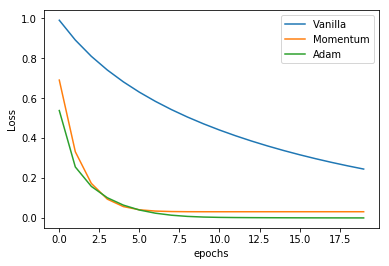

In [30]:
import matplotlib.pyplot as plt
epoch = [ i for i in range(epochs) ]

figure,ax = plt.subplots()
ax.plot(epoch,train_loss_v,label = "Vanilla")
ax.plot(epoch,train_loss_m,label = "Momentum")
ax.plot(epoch,train_loss_a,label = "Adam")
ax.legend()
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers .</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>